In [482]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from functools import reduce

%matplotlib inline

In [417]:
data = pd.read_csv("Dados-medicos.txt", " ")
data.drop("Unnamed: 1", axis=1, inplace=True)
data.drop("Unnamed: 2", axis=1, inplace=True)
data.columns = ["idade", "peso", "carga", "vo2"]
pd.set_option("display.max_colwidth", 1000)

### Questão 1.1

In [627]:
def log_likelihood(N, var, sum_error):
    ll = -((N/2) * np.log(2*math.pi)) - ((N/2) * np.log(var)) - ((1/(2*var)) * sum_error)
    return -ll

def calculate_regression(dados, x_label, y_label, N):
    models = []
    result = {"vies":[], "coeficientes": [], "nll": [], "rss": []}
    
    for d in range(1, N+1):
        for label in x_label:
            dados["d%s_%s" %(d, label)] = dados[label]**d
        # Create linear regression object
        regr = linear_model.LinearRegression()
        # Train the model using the training sets
        X = 0
        for idx, label in enumerate(x_label):
            try:
                X = np.concatenate((X, np.array(dados[["d%s_%s" %(i, label) for i in range(1,d+1)]].values, order='F')), axis=1)
            except ValueError:
                X = np.array(dados[["d%s_%s" %(i, label) for i in range(1,d+1)]].values, order='F')
                
        Y = np.array(dados[y_label].values)
        regr.fit(X, Y)
        models.append({"data": X, "regr": regr})
        # Intercept
        result["vies"].append(regr.intercept_)
        # The coefficients
        result["coeficientes"].append(regr.coef_)
        error_array = (Y - regr.predict(X))
        error_var = np.var(error_array, axis=0)
        #RSS
        result["rss"].append(np.sum(error_array**2))
        nll = log_likelihood(len(X), error_var, np.sum(error_array**2))
        result["nll"].append(nll)
        
    return result, X, Y, models

# Plot outputs
def plot_regression(X, Y, x_label, y_label, models):
    fig = plt.figure()
    plt.scatter(X[:,0], Y,  color='black')
    for idx, model in enumerate(models):
        model['data'].sort(axis=0)
        plt.plot(model['data'][:,0], model['regr'].predict(model['data']), linewidth=2, label='d%s' % (idx+1))
    plt.title("Modelo de regressão linear")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()

In [628]:
dados = data[['carga', 'vo2']]
N = 10

# Resultados
result, X, Y, models = calculate_regression(dados, ['carga'], 'vo2', N)
df = pd.DataFrame.from_dict(result)
df

/home/lmoraes/miniconda/envs/notebook3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


coeficientes  \
0                                                                                                                                                                                   [0.131539342634]   
1                                                                                                                                                               [0.142337642767, -2.89640764561e-05]   
2                                                                                                                                            [0.137104924617, 5.55043576923e-07, -4.88650337752e-08]   
3                                                                                                                        [0.201617768043, -0.000576564876431, 1.97738599269e-06, -2.41195815425e-09]   
4                                                                                                     [0.189567086726, -0.00042661671206, 1.14967111316e-06, -3.39585822668e-10, -1.91369336472e-12]   
5                                                                                  [0.381966655711, -0.00355189646701, 2.53044458873e-05, -9.58287115669e-08, 1.83882375089e-10, -1.40650489991e-13]   
6                                                             [8.17960995135e-05, 0.00433638566604, -5.5912785113e-05, 3.60570288594e-07, -1.23449055354e-09, 2.14250415552e-12, -1.48243129265e-15]   
7                                        [9.71347264493e-09, 1.83717846797e-06, 4.11499614362e-05, -5.75607416554e-07, 3.55370549009e-09, -1.13757807304e-11, 1.84020174131e-14, -1.18920103922e-17]   
8                       [6.73637744871e-18, -3.09190595173e-14, 1.65306999765e-13, 1.60832727138e-11, 9.336852144e-10, -1.00378829978e-11, 4.14526302114e-14, -7.68321397337e-17, 5.35122204168e-20]   
9  [1.92537046308e-22, -4.16258319836e-15, 6.27816171653e-18, 8.40220656008e-16, 8.33058192402e-14, 4.98597322264e-12, -5.41675098843e-14, 2.23407174526e-16, -4.11310309162e-19, 2.83901073081e-22]   

           nll           rss       vies  
0  3553.049317  29490.220958   6.734248  
1  3552.206785  29447.851323   5.875769  
2  3552.181895  29446.600579   6.136837  
3  3551.529507  29413.836218   3.837254  
4  3551.524819  29413.600909   4.170379  
5  3551.247108  29399.664800  -0.127396  
6  3550.786649  29376.572617   6.889998  
7  3551.559286  29415.330980  10.416625  
8  3583.000127  31036.667015  16.191875  
9  3612.400411  32633.535159  17.792191

In [629]:
%matplotlib inline
plot_regression(X, Y, 'Carga', "VO2", models)

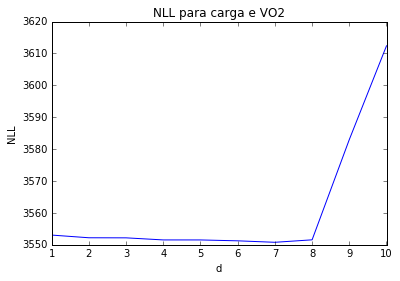

NLL minimo encontrado para dimensão 7
Diferenca entre d1 e d7: 2.26
Como a diferença entre os NLLs d1 e d7 é muito pequena, melhor escolher d1 pela simplicidade do modelo. Acima de d8 o NLL aumenta muito e a regressão é considerada com overfitting.


In [630]:
plt.plot(range(1,11), result["nll"])
plt.title("NLL para carga e VO2")
plt.ylabel("NLL")
plt.xlabel("d")
plt.show()

print("NLL minimo encontrado para dimensão %d" % (np.argmin(result["nll"])+1))
print("Diferenca entre d1 e d7: %.2f" % (result["nll"][0] - result["nll"][6]))
print("Como a diferença entre os NLLs d1 e d7 é muito pequena, melhor escolher d1 pela simplicidade do modelo. "
      "Acima de d8 o NLL aumenta muito e a regressão é considerada com overfitting.")

### Questão 1.2

In [631]:
dados = data[['idade', 'vo2']]
N = 10

# Resultados
result, X, Y, models = calculate_regression(dados, ['idade'], 'vo2', N)
df = pd.DataFrame.from_dict(result)
df

/home/lmoraes/miniconda/envs/notebook3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


coeficientes  \
0                                                                                                                                                                                     [-0.448520971182]   
1                                                                                                                                                                  [0.0341448703288, -0.00457454045207]   
2                                                                                                                                                  [1.14743430096, -0.0269469817398, 0.000140542318686]   
3                                                                                                                             [-0.967693881872, 0.0401314740263, -0.000746685834819, 4.16960569087e-06]   
4                                                                                                            [-5.95395245178, 0.257812813772, -0.00522687056726, 4.79796218304e-05, -1.63893773584e-07]   
5                                                                                          [10.5591980189, -0.664248741927, 0.0208127246129, -0.000346529410799, 2.89196075678e-06, -9.49755585186e-09]   
6                                                                         [17.9057117292, -1.16362044973, 0.0387969477962, -0.00071868516724, 7.33462843866e-06, -3.79296203208e-08, 7.54993944687e-11]   
7                                                     [0.0252058284809, 0.320086900947, -0.028461936189, 0.00110811970275, -2.32004969018e-05, 2.69751428229e-07, -1.63825865862e-09, 4.0508081295e-12]   
8                           [1.0371252385e-05, 0.00024498661036, 0.00231722492639, -0.000259615872495, 1.14993777339e-05, -2.62481233924e-07, 3.25135014527e-09, -2.07454075504e-11, 5.34198723394e-14]   
9  [-7.10040042027e-09, -2.82830190189e-07, -5.06541336471e-06, -5.62013193859e-05, 3.93162376938e-06, -1.11968186107e-07, 1.57748498883e-09, -1.09144109091e-11, 2.96338554732e-14, -4.3106863654e-20]   

           nll           rss       vies  
0  4121.588418  77809.377631  53.296839  
1  4109.113650  76170.478020  41.560371  
2  4104.741579  75604.294561  24.509915  
3  4103.375802  75428.290478  47.707325  
4  4102.633140  75332.757623  90.399657  
5  4101.790687  75224.534535 -25.732197  
6  4101.772796  75222.237943 -69.717503  
7  4101.724507  75216.039568  20.270519  
8  4101.793719  75224.923789  38.713923  
9  4101.784119  75223.691408  41.548440

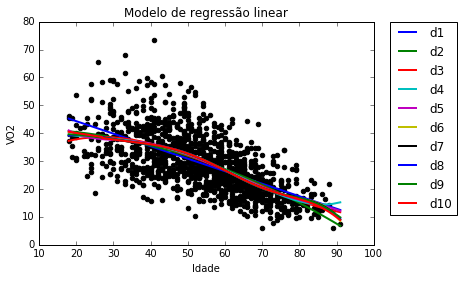

In [632]:
%matplotlib inline
plot_regression(X, Y, 'Idade', "VO2", models)

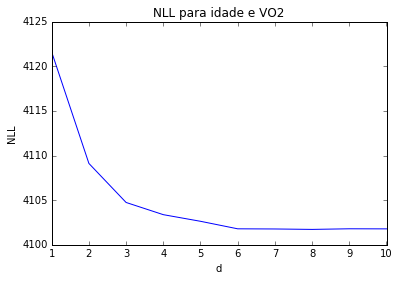

NLL minimo encontrado para dimensão 8
Neste problema é possível visualizar como o NLL diminui conforme aumentamos as dimensões, até atingir o mínimo em d8. Após isso, como no exemplo anterior, o overfitting começa a ficar muito evidente.


In [633]:
plt.plot(range(1,11), result["nll"])
plt.title("NLL para idade e VO2")
plt.ylabel("NLL")
plt.xlabel("d")
plt.show()

print("NLL minimo encontrado para dimensão %d" % (np.argmin(result["nll"])+1))
print("Neste problema é possível visualizar como o NLL diminui conforme aumentamos as dimensões, até "
      "atingir o mínimo em d8. Após isso, como no exemplo anterior, o overfitting começa a ficar muito evidente.")

### Questão 1.3

In [615]:
dados = data[['idade','carga', 'vo2']]
N = 10

# Resultados
result, X, Y, models = calculate_regression(dados, ['idade', 'carga'], 'vo2', N)
df = pd.DataFrame.from_dict(result)
df

coeficientes  \
0                                                                                                                                                                                                                                                                                                                                                                     [-0.0303563394111, 0.127119575524]   
1                                                                                                                                                                                                                                                                                                                                [-0.283996560625, 0.00263026350828, 0.154298520329, -5.86970291378e-05]   
2                                                                                                                                                                                                                                                                                            [-0.819327123485, 0.013347867226, -6.68108866767e-05, 0.165414678276, -0.00012257764546, 1.15876048974e-07]   
3                                                                                                                                                                                                                                                   [-0.542329498693, 0.00511947859685, 3.3290581488e-05, -4.25217603183e-07, 0.244108237864, -0.000807045789557, 2.47417498036e-06, -2.77356033892e-09]   
4                                                                                                                                                                                                                  [2.63701749901, -0.133728618311, 0.00289054925279, -2.83400530806e-05, 1.04260731508e-07, 0.225395474102, -0.000603450005602, 1.447104777e-06, -3.0911004191e-10, -2.25568518921e-12]   
5                                                                                                                                                                 [-0.000176842691693, -0.00166782911353, -0.000455461144865, 1.72737036522e-05, -2.15126496246e-07, 9.02507778318e-10, 0.392425577659, -0.00328534459033, 2.20402661576e-05, -8.14532769011e-08, 1.55406715274e-10, -1.19299535528e-13]   
6                                                                                                                           [-2.14752251919e-06, -6.97624473361e-05, -0.0009466763369, 4.24298612087e-05, -7.46608775336e-07, 6.0108036269e-09, -1.84750644605e-11, 8.9616770616e-05, 0.00475132219969, -5.97520451302e-05, 3.73012587741e-07, -1.24334040112e-09, 2.11431154702e-12, -1.4407623857e-15]   
7                                                                                      [1.38809069227e-10, 5.10332847916e-07, 1.27433099118e-07, 1.6388870138e-06, -2.61491417521e-07, 8.2806281305e-09, -9.7498522165e-11, 3.94730302559e-13, 9.8594162752e-09, 9.45266031721e-07, 4.32166120237e-05, -5.94539886904e-07, 3.60137239508e-09, -1.13241123539e-11, 1.80310568393e-14, -1.14937076986e-17]   
8                                           [-4.66983828129e-17, 1.60323422358e-12, -1.38218279291e-13, -5.21437819499e-12, -1.51567005796e-10, -2.72319314533e-09, 1.05537708952e-10, -1.35969738607e-12, 5.80389820732e-15, 8.86156637367e-18, 1.4855625313e-15, 1.74553200516e-13, 1.57005068017e-11, 8.74510107867e-10, -9.35389606814e-12, 3.84787046115e-14, -7.11070527341e-17, 4.9409250395e-20]   
9  [-9.86888899873e-23, 2.28540018862e-15, -6.94313937029e-19, -2.67069921202e-17, -1.23730395059e-15, -4.71540718783e-14, -1.19303661737e-12, 2.85410718021e-14, -1.95076626985e-16, -5.24508481866e-20, 1.07724218209e-22, 2.65608500131e-20, 4.6435587283e-18, 6.43834191236e-16, 6.74599595957e-14, 4.20663422692e-12, -4.52215104191e-14, 1.84931601422e-16, -3.38073024196e-19, 2.31941488409e-22]   

           nll         

In [616]:
def plot_regression3d(X, Y, x_label, y_label, models):
    
    x = X[:,0]
    y = X[:,len(models)]
    
    x.sort()
    done = []
    x_axis = np.linspace(x.min(), x.max(), 100)
    y_axis = np.linspace(y.min(), y.max(), 100)
    xx, yy = np.meshgrid(x_axis, y_axis)
    for idx, model in enumerate(models):
        fig = plt.figure(figsize=(8,4))
        ax = fig.gca(projection='3d')
        ax.scatter(x, y, Y, c='black', s=60)
        for x_id, value_x in enumerate(xx):
            for i in range(0, idx+1):
                if not i:
                    dados_temp = value_x.copy()
                else:
                    dados_temp = np.concatenate((dados_temp, np.power(value_x, i+1)))
                    
            for i in range(0, idx+1):
                dados_temp = np.concatenate((dados_temp, np.power(yy[x_id], i+1)))
                
            dados_temp = dados_temp.reshape(2*(idx+1), len(value_x)).T
            if not x_id:
                z_plot = np.array(model['regr'].predict(dados_temp))
            else:
                z_plot = np.append(z_plot, np.array(model['regr'].predict(dados_temp)))                
            
        z_plot = z_plot.reshape(len(value_x),len(xx))
        ax.plot_surface(xx, yy, z_plot, color='red', alpha=0.3)
        ax.set_xlabel(x_label[0])
        ax.set_ylabel(x_label[1])
        ax.set_zlabel(y_label)
        ax.set_title("d%d" % (idx+1))
        plt.show()


    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

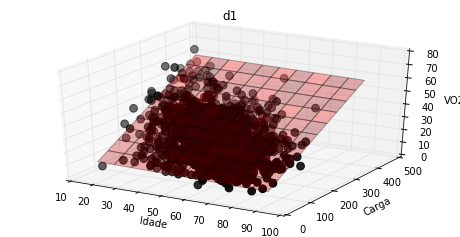

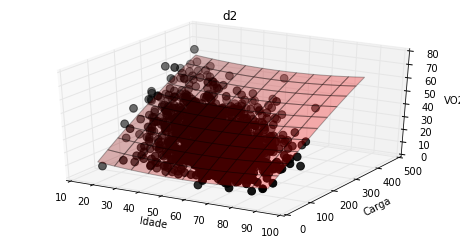

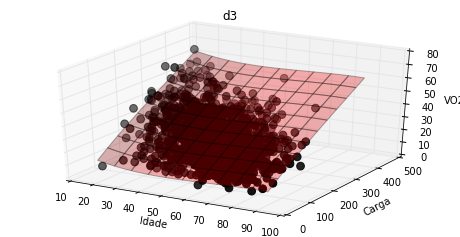

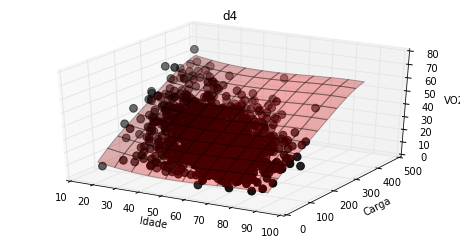

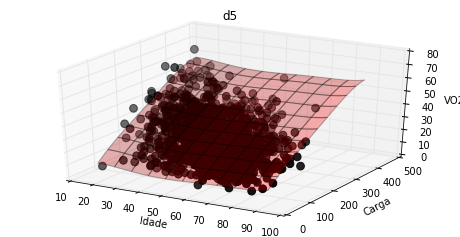

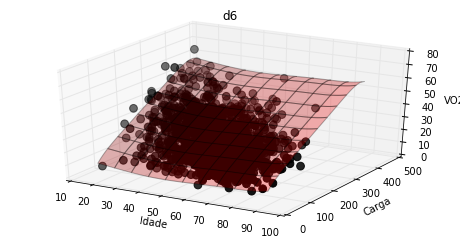

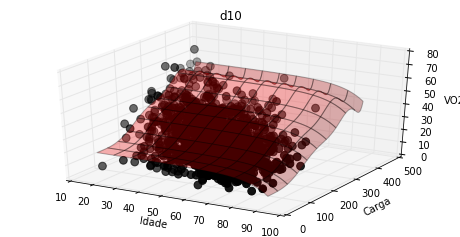

In [617]:
%matplotlib inline
plot_regression3d(X, Y, ['Idade', 'Carga'], 'VO2', models)

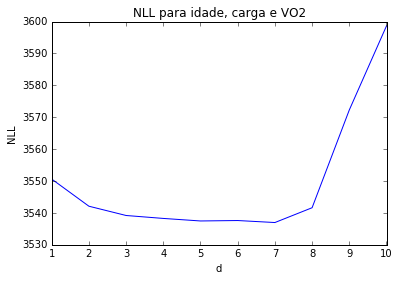

NLL minimo encontrado para dimensão 7
Neste gráfico é possível observar como o NLL diminui enquanto aumentamos as dimensões, atingindo seu mínimoem d=7. Após essa dimensão, o NLL aumenta consideravelmente, indicando o overfitting do modelo.


In [619]:
plt.plot(range(1,11), result["nll"])
plt.title("NLL para idade, carga e VO2")
plt.ylabel("NLL")
plt.xlabel("d")
plt.show()

print("NLL minimo encontrado para dimensão %d" % (np.argmin(result["nll"])+1))
print("Neste gráfico é possível observar como o NLL diminui enquanto aumentamos as dimensões, atingindo seu mínimo"
     "em d=7. Após essa dimensão, o NLL aumenta consideravelmente, indicando o overfitting do modelo.")

### Questão 2

As fórmulas encontradas na Questão 3 da lista 2 são:

$a=\frac{Cov(x,y)}{Var(x)}$

$b=E[Y] - \frac{Cov(x,y)}{Var(x)} E[X]$

In [643]:
def media(dados):
    mu = dados.sum()/dados.shape[0]
    return mu

def variancia(dados):
    var = ((dados - media(dados))**2).sum()
    var = var/dados.shape[0]
    return var

def covariancia(dados, var):
    for i in range(dados.shape[1]):
        for j in range(i+1, dados.shape[1]):
            for row in dados.iterrows():
                cov = (row[1][i]-media(dados[dados.columns[i]]))*(row[1][j]-media(dados[dados.columns[j]]))
                var[i,j] += cov
                var[j,i] += cov
            var[i,j] = var[i,j]/dados.shape[0]
            var[j,i] = var[j,i]/dados.shape[0]
        
    return var

def covariancia_matrix(dados):
    var_diag = variancia(dados)
    var = np.diag(var_diag)
    var = covariancia(dados, var)
    return var

In [644]:
dados = data[['carga', 'vo2']]
cov_matrix = covariancia_matrix(dados)

a = cov_matrix[0][1]/cov_matrix[0][0]
b = media(dados['vo2']) - a * media(dados['carga'])

print("a = %.3f" % a)
print("b = %.3f" % b)
print("Esses valores de a e b são justamente os encontrados como resposta da regressão linear.")

a = 0.132
b = 6.734
Esses valores de a e b são justamente os encontrados como resposta da regressão linear.


### Questão 3.1

In [380]:
def normal_multivariate(mu, sigma, dados):
    return (np.linalg.det(2*np.pi*sigma)**(-1/2))*np.exp(-1/2 * np.dot(np.dot((dados-mu), np.linalg.inv(sigma)), (dados-mu).T))

In [381]:
%matplotlib inline
def plot_normal(x_label, y_label, dados):
    mu = media(dados)
    sigma = covariancia_matrix(dados)

    x_axis = np.linspace(dados[x_label].min(), dados[x_label].max(), 100)
    y_axis = np.linspace(dados[y_label].min(), dados[y_label].max(), 100)
    xx,yy = np.meshgrid(x_axis,y_axis)

    z_plot = np.empty((x_axis.shape[0], y_axis.shape[0]))

    for idx, x_item in enumerate(tqdm(x_axis)):
        for idy, y_item in enumerate(y_axis):
            item = {x_label: [x_item], y_label: [y_item]}
            dados_df = pd.DataFrame.from_dict(item)
            z_plot[idx, idy] = normal_multivariate(mu, sigma, dados_df)

    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    jet = plt.get_cmap('jet')
    surf = ax.plot_surface(xx, yy, z_plot, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel('pdf')
    plt.show()

In [382]:
dados = data[['carga', 'vo2']]
plot_normal('carga', 'vo2', dados)

100%|██████████| 100/100 [00:12<00:00,  7.94it/s]


### Questão 3.2

100%|██████████| 100/100 [00:12<00:00,  7.90it/s]


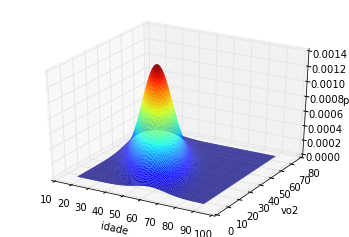

In [383]:
dados = data[['idade', 'vo2']]
plot_normal('idade', 'vo2', dados)

### Questão 3.3 e 3.4

### Questão 4

O Classificador de Naive Bayes assume que cada feature é independente da outra. Portanto, a probabilidade final de que uma observação ocorra dada uma distribuição é o produtório do resultado individual de cada feature. Para calcular os parâmetros $\theta = \{\mu, \sigma^2\}$ de cada classe $c_j$, obtêm-se o MLE utilizando somente a parte do dataset que contém as observações $x_i$ pertencentes à classe desejada. Utilizando o modelo Gaussiano:

$\hat{\mu_{c_j}} = \frac{1}{N_{c_j}} \sum_{i=1}^{N_{c_j}} x_{i_{c_j}}$

$\hat{\sigma_{c_j}}^2 = \frac{1}{N_{c_j}} \sum_{i=1}^{N_{c_j}} (x_{i_{c_j}} - \mu_{c_j})^2$

$p(c_j) = \frac{N_{c_j}}{N}$

Separar o dataset nas respectivas faixas

In [506]:
# Separar o dataset nas respectivas faixas
faixas = []
faixas.append(data[data['peso'] < 77])
faixas.append(data[(data['peso'] >= 77) & (data['peso'] < 80)])
faixas.append(data[(data['peso'] >= 80) & (data['peso'] < 90)])
faixas.append(data[data['peso'] >= 90])

for i, item in enumerate(faixas):
    item.drop('peso', axis=1, inplace=True)
    print("Faixa %d possui %d pessoas" % (i+1, item.shape[0]))

Faixa 1 possui 328 pessoas
Faixa 2 possui 119 pessoas
Faixa 3 possui 329 pessoas
Faixa 4 possui 396 pessoas


/home/lmoraes/miniconda/envs/notebook3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Calcular média e variância para cada faixa e cada atributo

In [543]:
# Calcular média e variância para cada faixa e cada atributo
mu = []
var = []

for item in faixas:
    mu.append(media(item))
    var.append(variancia(item))

Com a quantidade de pessoas existentes por faixa, é possível calcular o prior de cada classe

In [541]:
# Com a quantidade de pessoas existentes por faixa, é possível calcular o prior de cada classe
prior = []
print("PRIOR:")
for i, item in enumerate(faixas):
    prior.append(item.shape[0]/data.shape[0])
    print("Faixa %d: %.2f" % (i+1, prior[i]))

PRIOR:
Faixa 1: 0.28
Faixa 2: 0.10
Faixa 3: 0.28
Faixa 4: 0.34


Com os parâmetros calculados é possível construir o classificador:

$p(c_j | x_d) = \frac{p(x_d | c_j) * p(c_j)}{\sum_{j'=1}^{C}p(x_d | c_j') p(c_j')}$

Para cada feature d do dataset é possível calcular o posterior. O resultado final da probabilidade, assumindo independência entre as features é o produtório do posterior de cada feature.

$p(c_j | x) = \prod_{d=1}^{D} p(c_j | x_d)$

In [602]:
# Com os parâmetros calculados é possível construir o classificador para uma observação nova.
# p(x|z)
def pdf_normal(x, mu, var):
    pdf = (2*math.pi*var)**(-1/2) * np.exp(-1/(2*var) * (x-mu)**2)
    return pdf

x_new = pd.DataFrame.from_dict({"carga": [30.0], "idade": [72.0], "vo2": [9.53]})
bayes = {}

for feature in x_new.columns:
    denominador = 0    
    bayes[feature] = []
    for i in range(len(faixas)):
        pdf = pdf_normal(x_new[feature][0], mu[i][feature], var[i][feature])
        probability = pdf*prior[i]
        denominador += probability
        bayes[feature].append(probability)
    bayes[feature] = bayes[feature]/denominador
    
bayes_classifier = []
for key in bayes:
    for i, item in enumerate(bayes[key]):
        try:
            bayes_classifier[i] *= item
        except IndexError:
            bayes_classifier.append(item)
            
for i, item in enumerate(bayes_classifier):
    print("Classificador %d possui probabilidade %.4f" % (i+1, item))
print("Classificador de maior probabilidade: %d" % (np.argmax(bayes_classifier)+1))

Classificador 1 possui probabilidade 0.0607
Classificador 2 possui probabilidade 0.0011
Classificador 3 possui probabilidade 0.0164
Classificador 4 possui probabilidade 0.0125
Classificador de maior probabilidade: 1
